In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib as mpl
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [5]:
# Check for missing values
df.dropna(inplace=True)

# Check for duplicates and delete
df.drop_duplicates(subset=['InvoiceNo', 'InvoiceDate'], keep='first', inplace=True)

# data filtering
neg_quantities = df[df['Quantity'] < 0]

# determination of the interquartile range for the Quantity column
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
# removing outliers from the Quantity column
df = df[(df['Quantity'] >= Q1 - 1.5 * IQR) & (df['Quantity'] <= Q3 + 1.5 * IQR)]

# Replacing negative Quantity values with positive ones
df['Quantity'] = df['Quantity'].abs()

# Replacing negative UnitPrice values with positive ones
df['UnitPrice'] = df['UnitPrice'].abs()

In [6]:
sales_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:20]
print(sales_by_product)

Description
REGENCY CAKESTAND 3 TIER              1365
RABBIT NIGHT LIGHT                    1136
WHITE HANGING HEART T-LIGHT HOLDER    1135
ASSORTED COLOUR BIRD ORNAMENT         1065
HEART OF WICKER SMALL                  745
PARTY BUNTING                          687
PAPER CHAIN KIT 50'S CHRISTMAS         644
LUNCH BAG RED RETROSPOT                622
CHILLI LIGHTS                          613
VICTORIAN GLASS HANGING T-LIGHT        584
ROSES REGENCY TEACUP AND SAUCER        568
SET OF 4 PANTRY JELLY MOULDS           562
Manual                                 546
STRAWBERRY CERAMIC TRINKET BOX         545
JAM MAKING SET PRINTED                 542
ASSORTED COLOURS SILK FAN              521
JUMBO BAG RED RETROSPOT                514
PACK OF 72 RETROSPOT CAKE CASES        491
JAM MAKING SET WITH JARS               487
DOORMAT KEEP CALM AND COME IN          486
Name: Quantity, dtype: int64


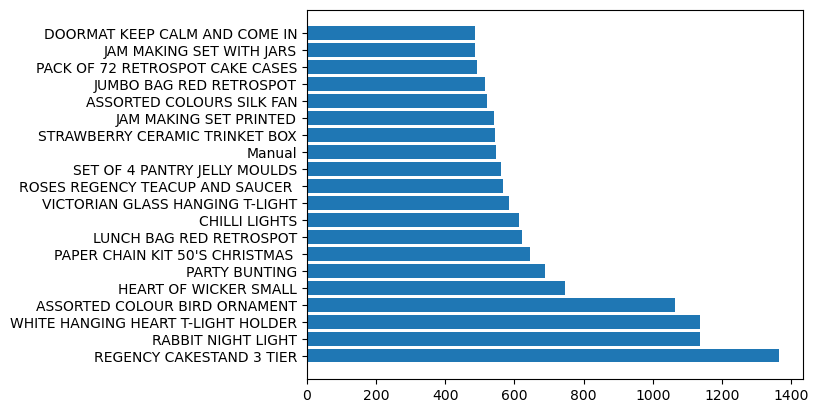

In [7]:
# Create a bar chart of the top 10 products by quantity sold

df = df[df['Quantity'] > 0]
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:20]
plt.barh(top_products.index, top_products.values)
plt.show()


<Figure size 1500x500 with 0 Axes>

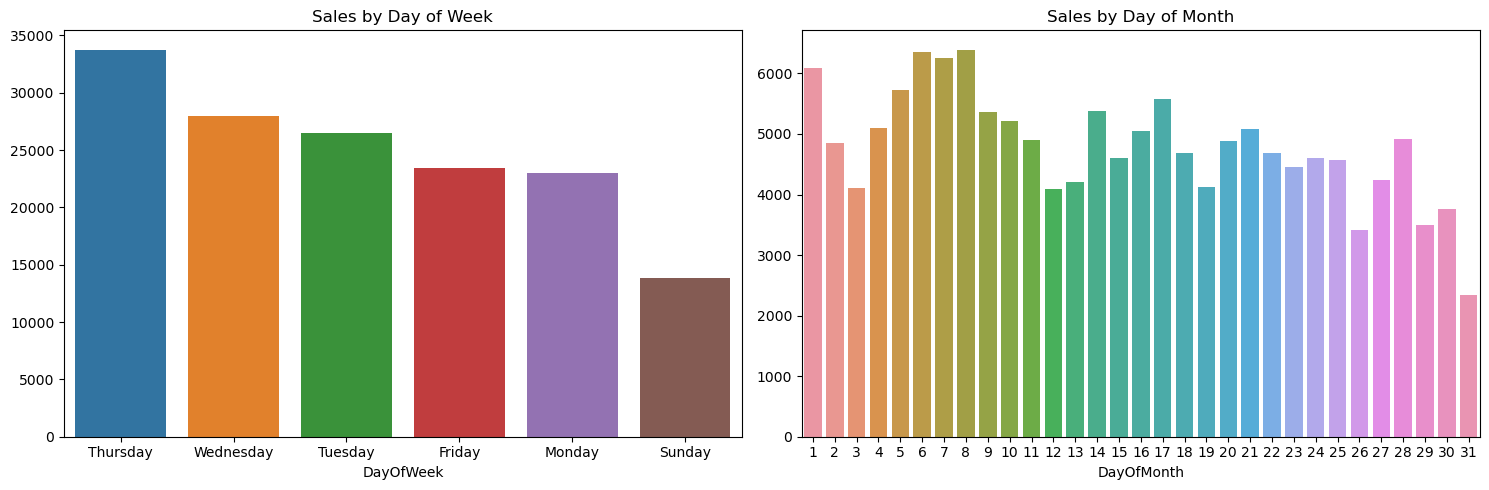

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Visualization of sales by days of the week and days of the month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['DayOfMonth'] = df['InvoiceDate'].dt.day
sales_by_day_of_week = df.groupby('DayOfWeek')['Quantity'].sum().sort_values(ascending=False)

sales_by_day_of_month = df.groupby('DayOfMonth')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values)
plt.title('Sales by Day of Week')

plt.subplot(1,2,2)
sns.barplot(x=sales_by_day_of_month.index, y=sales_by_day_of_month.values)
plt.title('Sales by Day of Month')

plt.tight_layout()
plt.show()

Country
United Kingdom    131328
Germany             4411
France              3985
EIRE                2440
Belgium              877
Spain                838
Portugal             521
Netherlands          436
Switzerland          423
Australia            394
Name: Quantity, dtype: int64


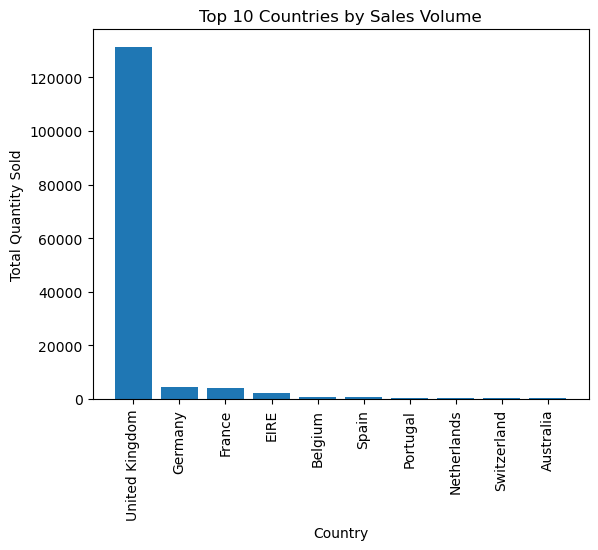

In [9]:
# Grouping data by country and calculating total sales
grouped_df = df.groupby('Country')['Quantity'].sum()

# Sorting data in descending order and selecting the first 10 values
top_10_countries = grouped_df.sort_values(ascending=False)[:10]
print(top_10_countries)

# Plotting
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Countries by Sales Volume')
plt.show()

C:\Users\DrAhm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DrAhm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DrAhm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DrAhm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DrAhm\anaconda3\lib\site-packages\sklearn\clust

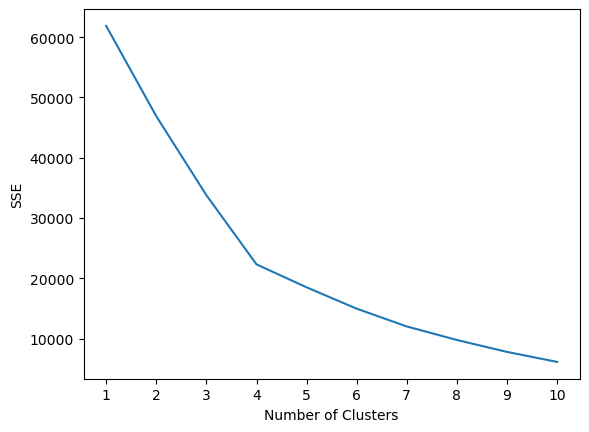

C:\Users\DrAhm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          Quantity            UnitPrice           CustomerID
              mean median          mean    median      count
Cluster                                                     
0         3.105910    2.0     23.659973      3.75      13908
1        15.731511   12.0      2.031696      1.45       6693
2         1.000000    1.0  11888.374091  11062.06         22


In [10]:
#customer Segmentation analysis 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df[['Quantity', 'UnitPrice', 'CustomerID']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Perform clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Add cluster labels to the data
df['Cluster'] = clusters
# Analyze the clusters
cluster_analysis = df.groupby('Cluster').agg({
    'Quantity': ['mean', 'median'],
    'UnitPrice': ['mean', 'median'],
    'CustomerID': 'count'
})

print(cluster_analysis)

In [11]:
# cluster distribution by country 


pivot = pd.pivot_table(df, index='Country', columns='Cluster', values='CustomerID', aggfunc='count', fill_value=0)


percentages = (pivot.div(pivot.sum(axis=1), axis=0) * 100).round(2)


print(percentages)

Cluster                    0       1     2
Country                                   
Australia              52.38   47.62  0.00
Austria                50.00   50.00  0.00
Bahrain                50.00   50.00  0.00
Belgium                58.93   41.07  0.00
Brazil                  0.00  100.00  0.00
Canada                 20.00   80.00  0.00
Channel Islands        57.14   42.86  0.00
Cyprus                 85.71   14.29  0.00
Czech Republic         25.00   75.00  0.00
Denmark                23.53   76.47  0.00
EIRE                   59.48   40.52  0.00
European Community     80.00   20.00  0.00
Finland                63.64   36.36  0.00
France                 52.06   47.94  0.00
Germany                59.45   40.55  0.00
Greece                 50.00   50.00  0.00
Hong Kong              76.92   23.08  0.00
Iceland                14.29   85.71  0.00
Israel                 57.14   42.86  0.00
Italy                  70.37   29.63  0.00
Japan                  86.67   13.33  0.00
Lebanon    

In [13]:
#Based on the results of cluster analysis, the following conclusions can be drawn:

#Cluster 0 contains the majority of orders (378366 out of 541909), where the average Quantity value is at 10, and the average UnitPrice value is at 5.38. The median values of both variables are below the average values. This may indicate that most orders consist of a small number of items with a relatively high price.

#Cluster 1 also contains a significant number of orders (163539 out of 541909). In this cluster, the average value of Quantity is slightly higher than in cluster 0, and is 12, and the average value of UnitPrice is 2.84. The median values of both variables are also lower than the average values. This may indicate that most orders in this cluster contain a higher quantity of goods, but with a lower price.

#Cluster 2 contains only 4 orders, which makes it less significant for analysis. However, it can be noticed that the average value of Quantity in this cluster is at an extremely high level (77605), which is an outlier relative to the rest of the data. The average UnitPrice value in this cluster is at 1.56.

In [ ]:
#Recommendations:

#Cluster 0 contains the largest number of orders and is the most typical cluster. You can offer marketing campaigns that will be aimed at attracting customers who order a small amount of goods, but are willing to pay a higher price for them.

#Cluster 1 also contains a significant number of orders, and the average price in it is lower than in cluster 0. You can offer marketing campaigns that will be aimed at attracting customers who order more products with a lower price.

#Cluster 2 contains outliers that can greatly distort the overall picture of the data. You may consider removing this data from further analysis to get more accurate results.